In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore') # getting rid of FutureWarnings

In [3]:
adidas_df = pd.read_excel('Adidas US Sales Datasets.xlsx', header=4)
adidas_df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [5]:
adidas_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
adidas_df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
adidas_df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [8]:
adidas_df[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']].corr()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


In [9]:
adidas_df.groupby('Product')[['Total Sales', 'Units Sold']].mean()

,Total Sales,Units Sold
Product,,
Men's Apparel,77041.489415,190.960772
Men's Athletic Footwear,95449.490683,270.513043
Men's Street Footwear,129705.741615,368.521739
Women's Apparel,111342.574627,269.792910
Women's Athletic Footwear,66395.950187,197.531756
Women's Street Footwear,79603.739428,243.948383


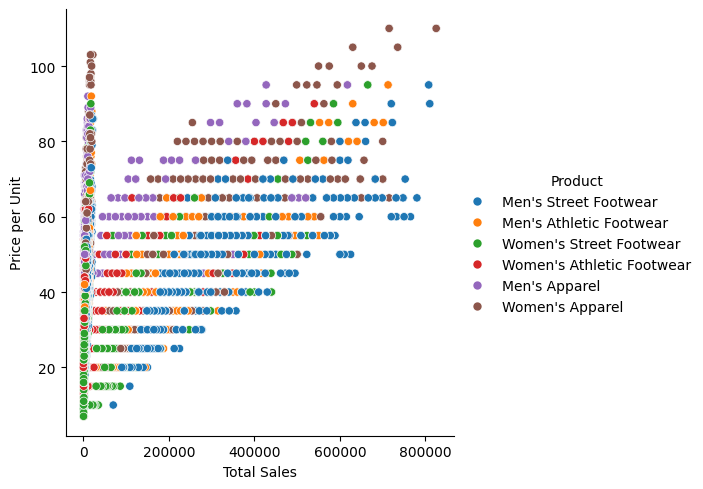

In [10]:
# sns.relplot(data=adidas_df, x='Price per Unit', y='Units Sold')
adidas_df.sort_values('Units Sold', ascending=False).head(15)
sns.relplot(data=adidas_df, x='Total Sales', y='Price per Unit', hue='Product')

<Axes: xlabel='Retailer', ylabel='Total Sales'>

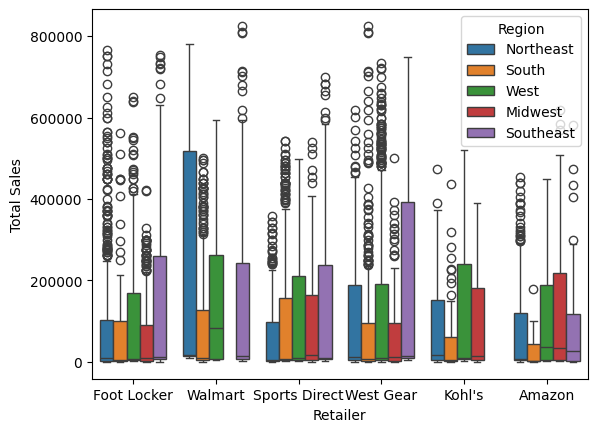

In [11]:
sns.boxplot(data=adidas_df, x='Retailer', y='Total Sales', hue='Region')

<Axes: xlabel='Sales Method', ylabel='count'>

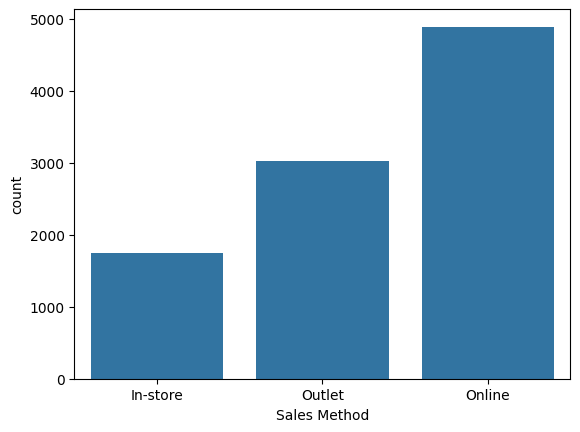

In [12]:
sns.countplot(data=adidas_df, x='Sales Method')

<Axes: xlabel='Sales Method', ylabel='Units Sold'>

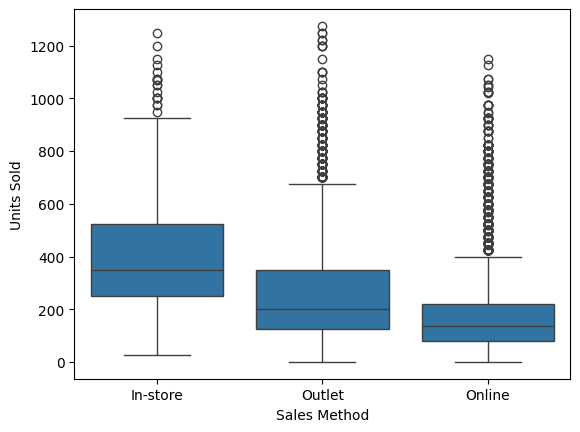

In [13]:
sns.boxplot(data=adidas_df, x='Sales Method', y='Units Sold')

In [14]:
adidas_df.groupby('City')['Operating Profit'].mean().sort_values(ascending=False).head(10)

City
Miami            84504.299375
Charlotte        67752.936597
Albany           65485.075764
New York         64351.727593
Detroit          56499.264028
Charleston       54191.632326
Denver           53566.359931
Columbus         52283.611736
Seattle          48551.410625
San Francisco    47482.636852
Name: Operating Profit, dtype: float64

In [15]:
adidas_df.groupby('City')['Operating Profit'].mean().sort_values().head(5)

City
Providence        14101.005833
Boston            15527.203102
Omaha             16940.822292
Salt Lake City    17932.542130
Des Moines        18439.009514
Name: Operating Profit, dtype: float64